## Pandas 리뷰

### 리스트로 데이터프레임 만들기
1. pandas 설치
2. pandas.DataFrame
    - numpy array를 DataFrame으로 변환하기
    - csv 파일 읽기 
    - 회귀모형과 행렬의 곱셈 
3. 역행렬의 계산
    - numpy.linalg.inv()를 이용한 역행렬의 계산
    - 역행렬의 성질 확인


### 리스트에서 열과 행 참조하기
1. columns의 인자 (열 이름)를 이용한 참조
    - [‘names_1’]
    - [[‘names_1’, ..., ‘names_k’]]
    - [bool vector]
2. iloc을 이용한 슬라이싱
    - [i,k], [:,k], [j,k]
3. loc을 이용한 인덱싱
    - [bool vector,:]
    - [:, bool vector]

### DataFrame의 생성 및 변환
1. DataFrame의 열 이름 변경
    - columns 객체의 직접 변경
    - DataFrame 내의 rename()을 이용
2. 데이터 테이블의 join
    - key를 이용한 데이터 식별
        + 하나의 key를 이용한 데이터 식별
        + 두 개 이상의 key를 이용한 데이터 식별
    - inner, left, right, outer join
3. DataFrame 의 concat
    - columns 값이 다른 DataFrame의 row-binding
        + 단순한 row-binding 결과 확인
        + 열이름 변경 후 row-binding 결과 확인
    - DataFrame의 column-binding
    - DataFrame의 열 추가

### Merge, Concat의 활용
1. DataFrame의 열 이름 변경
- columns 객체의 직접 변경
- DataFrame 내의 rename()을 이용

2. 데이터 테이블의 join
- key를 이용한 데이터 식별
    + 하나의 key를 이용한 데이터 식별
    + 두 개 이상의 key를 이용한 데이터 식별
- inner, left, right, outer join

3. DataFrame 의 concat
- columns 값이 다른 DataFrame의 row-binding
    + 단순한 row-binding 결과 확인
    + 열이름 변경 후 row-binding 결과 확인
- DataFrame의 column-binding
- DataFrame의 열 추가


### groupby 문법의 이해

1. numpy의 설치
- 가상환경의 선택
- conda install numpy
    Anaconda 설치 경로의 확인:


2. 벡터와 행렬의 생성
    numpy.array 
(1) 리스트를 이용한 벡터의 생성
(2) numpy.zeros(), numpy.ones()
(3) numpy.repeat()
(4) 리스트를 이용한 행렬의 생성
(5) 대각행렬 생성하기 (numpy.diag())

3. 벡터와 행렬의 형태 변환
(1) shape 이해하기
(2) reshape 이해하기 (order = ‘C’ or ‘F’)
----

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

리스트로부터 DataFrame 생성하기
- 리스트를 배열에 맞게 쓴다. 대부분 이차원 테이블형식의 데이터를 다루게 되므로 아래 예제와 같은 형태의 리스트를 입력하게 될 것이다.
- 열의 이름을 입력하기 위해서 **columns** 옵션에 문자열 리스트를 입력한다. 문자열 입력값이 없는 경우에는 0부터 시작하는 번호가 입력된다

In [4]:
a = pd.DataFrame([[1,2],[2,3]], columns = ['col1', 'col2'])
print(a)

   col1  col2
0     1     2
1     2     3


파일로부터 DataFrame 생성하기
- 이차원 테이블형식으로 저장된 데이터 혹은 테이블 데이터로 변형이 가능한 데이터(JSON, DICT)에 대해 경로를 지정하여 불러온다.
- csv파일의 경우 ***read_csv()*** 함수를 이용한다.
- txt파일의 경우 ***read_table()*** 함수를 이용한다. 
- json파일의 경우 ***read_json*** 함수를 이용한다.

In [6]:
path = "https://raw.githubusercontent.com/UOS-Bigdata/visualization/main/data/one_person_index.csv"
data = pd.read_csv(path, encoding='cp949')

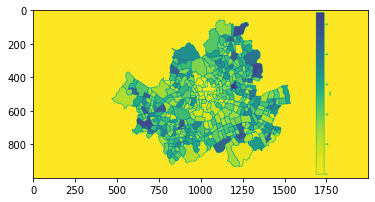

In [13]:
#grayImage = cv2.imread("../../data/example.png", cv2.IMREAD_GRAYSCALE)
#plt.imshow(grayImage)

In [ ]:
# 생성하기 csv
#data = pd.read_excel('1인가구.xlsx', 0)

# 열이름 변경하기
a.columns[1] = 'col2-1' #  error
a.rename( columns = {a.columns[1]: 'col2-1'})
a
# Tips! inplace 
a.rename( columns = {a.columns[1]: 'col2-1'}, inplace = True)
a

# 참조 및 추출
a.iloc[0,:]
a.iloc[0,:] = [10,20]
a

a.loc[:, [True, False]]
a.iloc[:, [0]]


# 데이터의  추가
a.append([[1,2]])
# why? 열 이름을 이용하여 병합하기 때문임 

# note 1
pd.concat([ a, pd.DataFrame([[1,2]]) ], axis = 0)
# note 2
b = pd.DataFrame([[10,20]])
b.columns = a.columns
pd.concat([a, b], axis = 0)
# note 2-1
b = pd.DataFrame([[10,20]], columns = a.columns)
pd.concat([a, b], axis = 0)

# 실패한 append 를 다음과 같이 병합
a.append( pd.DataFrame([[10,20]], columns = a.columns))

# 다음과 같은 경우에 편리함. 
b =  pd.DataFrame([[20,10]], columns = ['col2', 'col1'])
b
pd.concat([a, b], axis = 0)

# random 
amat = np.random.normal(0,1, size  = (10,2))
amat_pdf = pd.DataFrame(amat)
v = []
for i in range(2):
    v.append("v"+ str(i))
v
amat_pdf.columns = v

# iterable객체 활용 tip
["v"+str(i) for i in range(2)]

# 함수
data.head(n=5)
data.tail()
data.info()
data.describe()
data.columns

#
data['1인가구'].sum()
data['1인가구'].mean()
data['1인가구'].std()
data['1인가구'].quantile(0.1)
#
data.iloc[:,0].unique()
data['자치구'].unique()
data['자치구'].value_counts()
data[['자치구','행정동']].unstack()


# 열의 선택
data[data['자치구']=='강남구']
data[ (data['자치구']=='강남구') & (data['행정동']=='개포1동') ]
# 다음과 같은 실수
data[ data['자치구']=='강남구' & data['행정동']=='개포1동' ] # error